# Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


# Data Descrition
* label	- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
* aon	- age on cellular network in days
* daily_decr30	- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90	-Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30	- Average main account balance over last 30 days
* rental90	- Average main account balance over last 90 days
* last_rech_date_ma	- Number of days till last recharge of main account
* last_rech_date_da	- Number of days till last recharge of data account
* last_rech_amt_ma	- Amount of last recharge of main account (in Indonesian Rupiah)
* cnt_ma_rech30	- Number of times main account got recharged in last 30 days
* fr_ma_rech30	- Frequency of main account recharged in last 30 days
* sumamnt_ma_rech30	- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
* medianamnt_ma_rech30	- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian                           Rupiah)
* medianmarechprebal30	- Median of main account balance just before recharge in last 30 days at user level (in Indonesian                           Rupiah)
* cnt_ma_rech90	- Number of times main account got recharged in last 90 days
* fr_ma_rech90	- Frequency of main account recharged in last 90 days
* sumamnt_ma_rech90	- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
* medianamnt_ma_rech90	- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian                           Rupiah)
* medianmarechprebal90	- Median of main account balance just before recharge in last 90 days at user level (in Indonasian                           Rupiah)
* cnt_da_rech30	- Number of times data account got recharged in last 30 days
* fr_da_rech30	- Frequency of data account recharged in last 30 days
* cnt_da_rech90	- Number of times data account got recharged in last 90 days
* fr_da_rech90	- Frequency of data account recharged in last 90 days
* cnt_loans30	- Number of loans taken by user in last 30 days
* amnt_loans30	- Total amount of loans taken by user in last 30 days
* maxamnt_loans30	- maximum amount of loan taken by the user in last 30 days
* medianamnt_loans30	- Median of amounts of loan taken by the user in last 30 days
* cnt_loans90	- Number of loans taken by user in last 90 days
* amnt_loans90	- Total amount of loans taken by user in last 90 days
* maxamnt_loans90	- maximum amount of loan taken by the user in last 90 days
* medianamnt_loans90	- Median of amounts of loan taken by the user in last 90 days
* payback30	Average - payback time in days over last 30 days
* payback90	Average - payback time in days over last 90 days

In [3]:
df.shape

(209593, 37)

In [4]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We have total 209593 rows and 37 columns out of which 3 columns (Unnamed: 0, pcircle, pdate) as they dont contribute much to the model development

In [4]:
df.drop(['Unnamed: 0','pcircle','pdate','msisdn'],axis=1,inplace=True)
df.shape

(209593, 33)

In [5]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [6]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


As we can see there negative values present in continuous type of features which needs to treated first. So, as these values are monetory types of data we can convert all the negative values into 0.

In [7]:
df[df['aon']<0]=0
df[df['daily_decr30']<0]=0
df[df['daily_decr90']<0]=0
df[df['last_rech_date_ma']<0]=0
df[df['last_rech_date_da']<0]=0

In [8]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.862662,7969.251270,5379.140712,6080.251642,2671.701454,3461.570304,3713.792316,3652.333739,2038.080857,3.955814,...,2.734194,17.803276,267.273687,0.052900,18.169690,23.496596,6.569189,0.044949,3.383182,4.305839
std,0.344204,75000.694561,9221.648294,10919.824243,4305.530021,5769.612542,53606.740956,52942.582063,2365.218182,4.270646,...,2.574971,17.500045,4188.727269,0.215851,222.353825,26.580865,2.323790,0.198267,8.776745,10.277908
min,0.000000,0.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,237.000000,41.400000,41.613333,254.490000,285.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,516.000000,1460.000000,1500.000000,1056.080000,1306.500000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,972.000000,7243.000000,7801.700000,3330.570000,4179.700000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We are not replacing null values in rental30 and rental90 as chances are there average balance can be a minus figure. 

In [10]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

Since there are no null values, We can proceed.

# Dataframe Description:

The dataset contains the data of the customer. On the basis of the data we have to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. The column label indicates 1:successfully paid back the loan within 5 days and 0:failure in returning the loan within 5 days.

Here, our target variable would be a label which makes this problem as a classification type.

# Checking the datatypes of the columns

In [9]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

We cab observe we have mix of float and int datatypes

# Checking the distribution of the continuous values of the float type columns.

In [10]:
df_visualization_countinuous=df[['aon','daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianmarechprebal30','medianamnt_ma_rech90','medianmarechprebal90','cnt_da_rech30','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','cnt_loans90','medianamnt_loans90','payback30','payback90']].copy()

aon
10.48865093406506


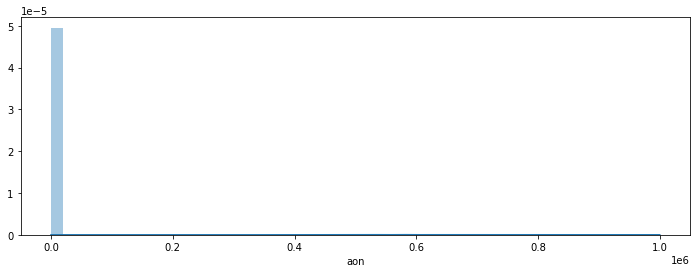

daily_decr30
3.945440165893533


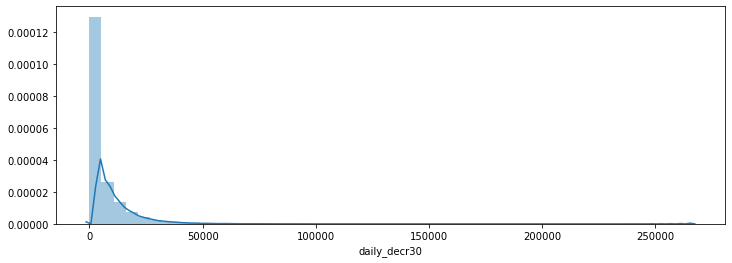

daily_decr90
4.2518320386476


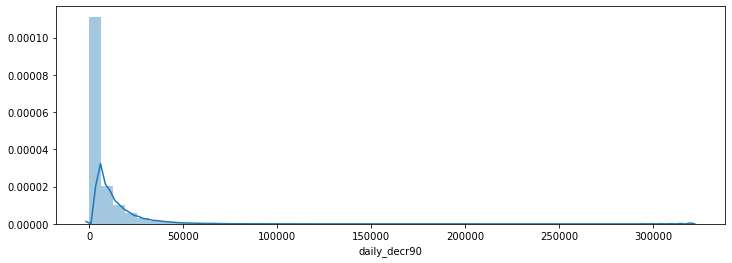

rental30
4.5103965576198926


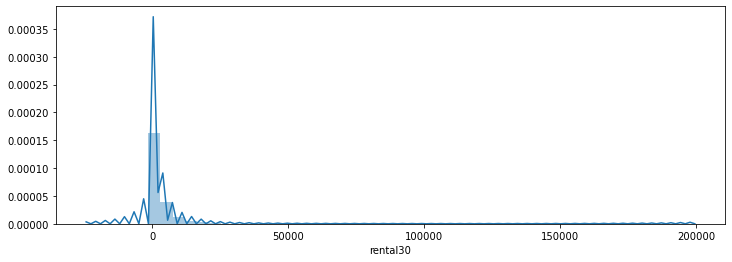

rental90
4.432673849672877


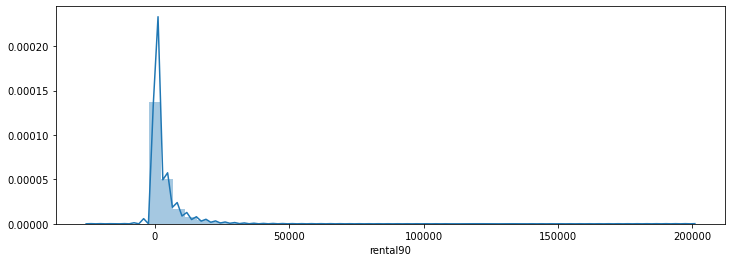

last_rech_date_ma
14.875420655790364


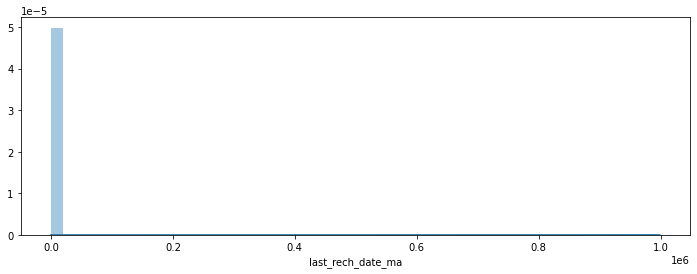

last_rech_date_da
14.934736903728346


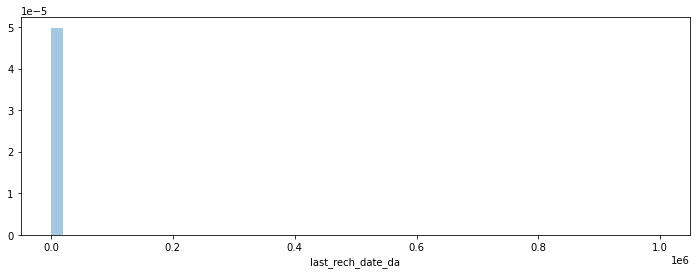

fr_ma_rech30
14.876731358441488


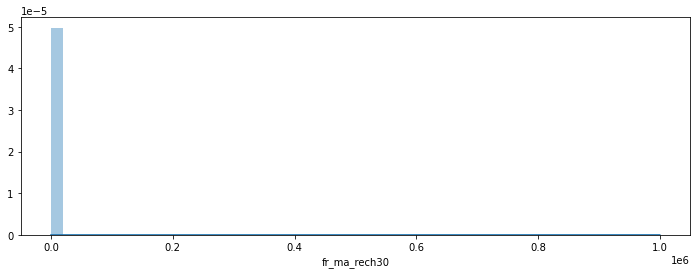

sumamnt_ma_rech30
6.367256912657858


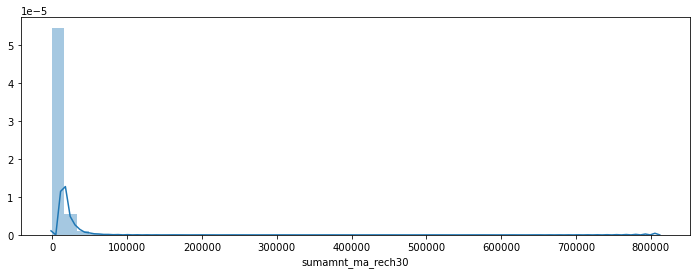

medianamnt_ma_rech30
3.425792699345999


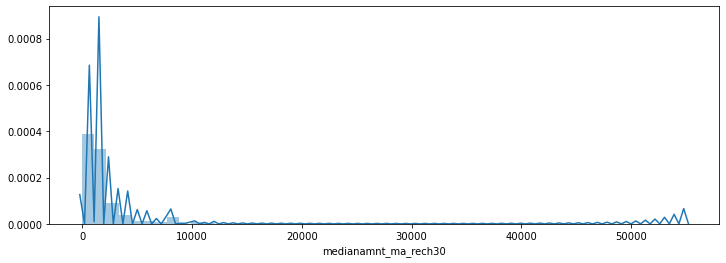

medianmarechprebal30
14.970715249332565


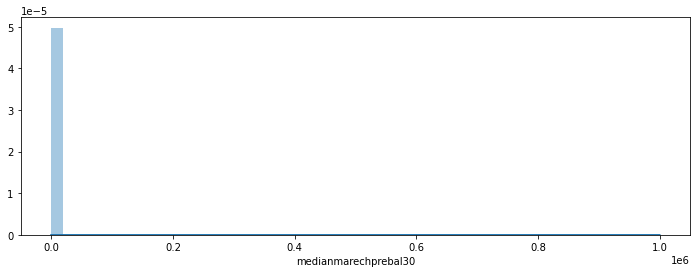

medianamnt_ma_rech90
3.675670133486236


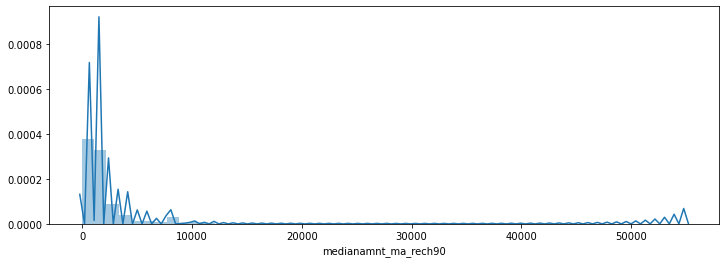

medianmarechprebal90
45.367361019361844


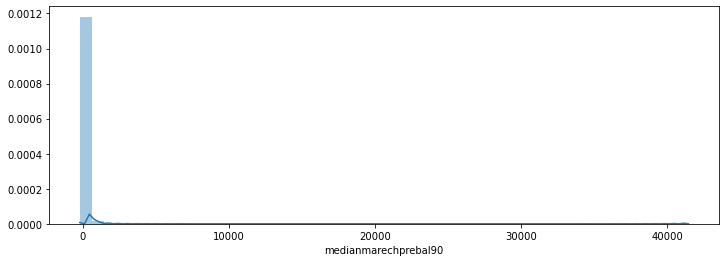

cnt_da_rech30
17.972943774547417


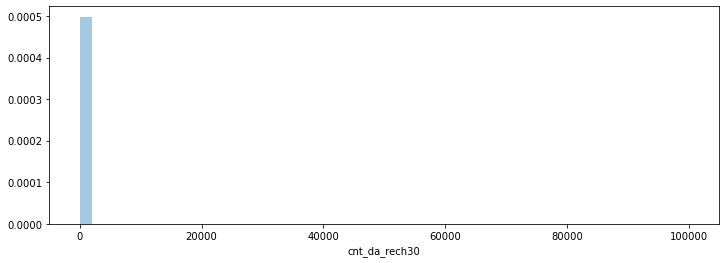

fr_da_rech30
14.948018729238346


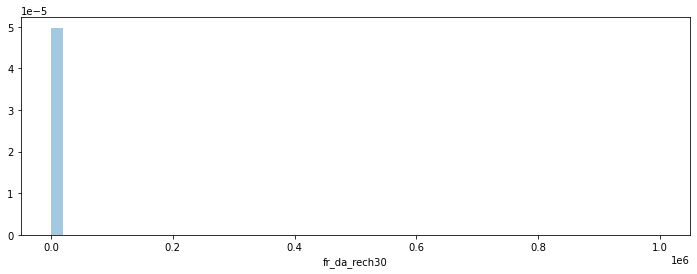

maxamnt_loans30
17.896424765658317


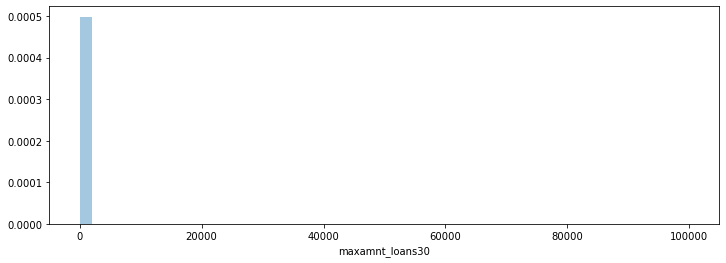

medianamnt_loans30
4.619264376411824


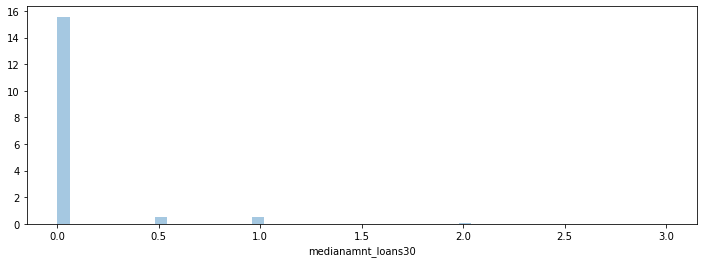

cnt_loans90
16.773758855185466


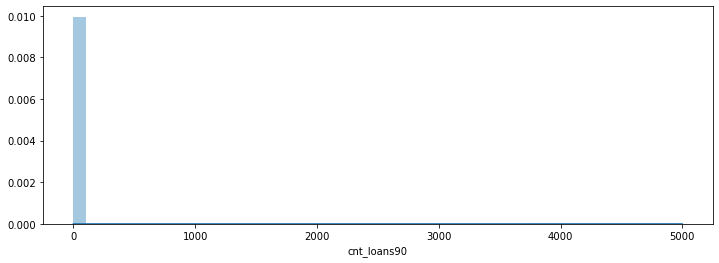

medianamnt_loans90
4.979078391464028


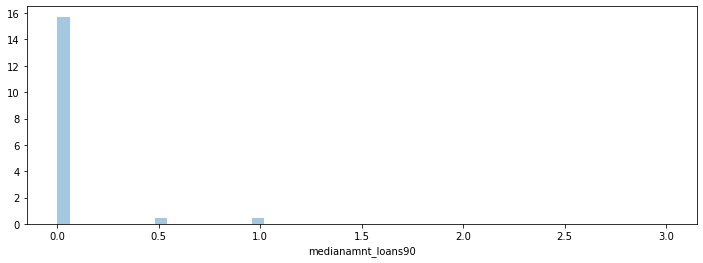

payback30
8.335370588755472


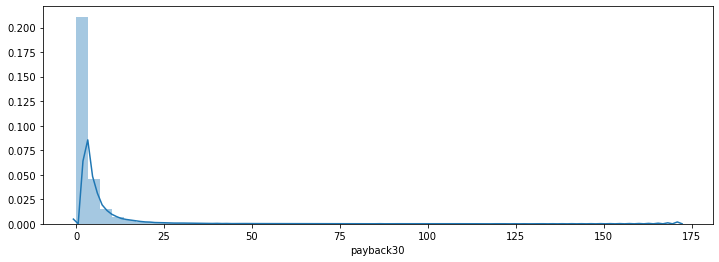

payback90
6.913466202398383


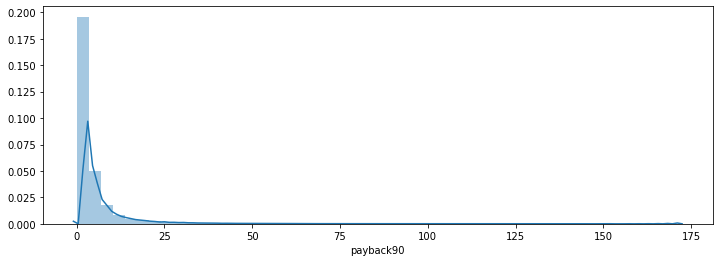

In [11]:
for col in df_visualization_countinuous:
    print(col)
    print(skew(df[col]))
    
    plt.figure(figsize=(12,4))
    sns.distplot(df[col])
    plt.show()

As we observe there are skewness in most of the columns.

In [12]:
corr = df.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.003173,0.182986,0.179934,0.083734,0.098514,0.006634,0.004671,0.159413,0.260956,...,0.233310,0.231937,0.004447,0.052738,0.009195,0.227674,0.228723,0.043616,0.060596,0.062574
aon,0.003173,1.000000,0.002253,0.001462,0.000476,0.000561,0.001931,-0.001474,0.005364,-0.001030,...,0.000442,0.000427,-0.002525,0.005767,-0.000748,-0.000502,0.005613,0.003855,0.002866,0.003170
daily_decr30,0.182986,0.002253,1.000000,0.977708,0.445114,0.461176,0.000916,-0.000984,0.282977,0.452982,...,0.368941,0.473318,0.001004,-0.008728,0.009969,0.564505,0.395978,-0.034501,0.028028,0.048186
daily_decr90,0.179934,0.001462,0.977708,1.000000,0.437615,0.473842,0.001324,-0.001268,0.270951,0.428238,...,0.343145,0.449618,0.001011,-0.002779,0.010418,0.568034,0.391777,-0.031992,0.020440,0.041755
rental30,0.083734,0.000476,0.445114,0.437615,1.000000,0.955351,-0.000410,0.004076,0.136218,0.239436,...,0.188071,0.240498,0.000187,-0.013723,0.005164,0.304532,0.249423,-0.032944,0.075476,0.097760
rental90,0.098514,0.000561,0.461176,0.473842,0.955351,1.000000,-0.001063,0.003560,0.129665,0.235346,...,0.178532,0.237953,-0.000394,-0.006710,0.006232,0.331936,0.263024,-0.031588,0.069203,0.101685
last_rech_date_ma,0.006634,0.001931,0.000916,0.001324,-0.000410,-0.001063,1.000000,0.001948,0.000926,0.005268,...,0.002358,0.001996,0.001119,0.001896,-0.000058,0.001760,0.003209,0.002824,-0.002100,-0.001394
last_rech_date_da,0.004671,-0.001474,-0.000984,-0.001268,0.004076,0.003560,0.001948,1.000000,0.001329,0.002634,...,0.001778,0.001862,0.000130,-0.000635,-0.000793,0.001636,0.005710,-0.003089,0.000593,0.000963
last_rech_amt_ma,0.159413,0.005364,0.282977,0.270951,0.136218,0.129665,0.000926,0.001329,1.000000,0.008091,...,-0.012400,0.022648,0.001961,0.032426,0.001824,0.025766,0.187793,0.024892,-0.023193,-0.009616
cnt_ma_rech30,0.260956,-0.001030,0.452982,0.428238,0.239436,0.235346,0.005268,0.002634,0.008091,1.000000,...,0.768931,0.755417,0.001603,-0.062938,0.016375,0.688320,0.212080,-0.067366,0.046400,0.020168


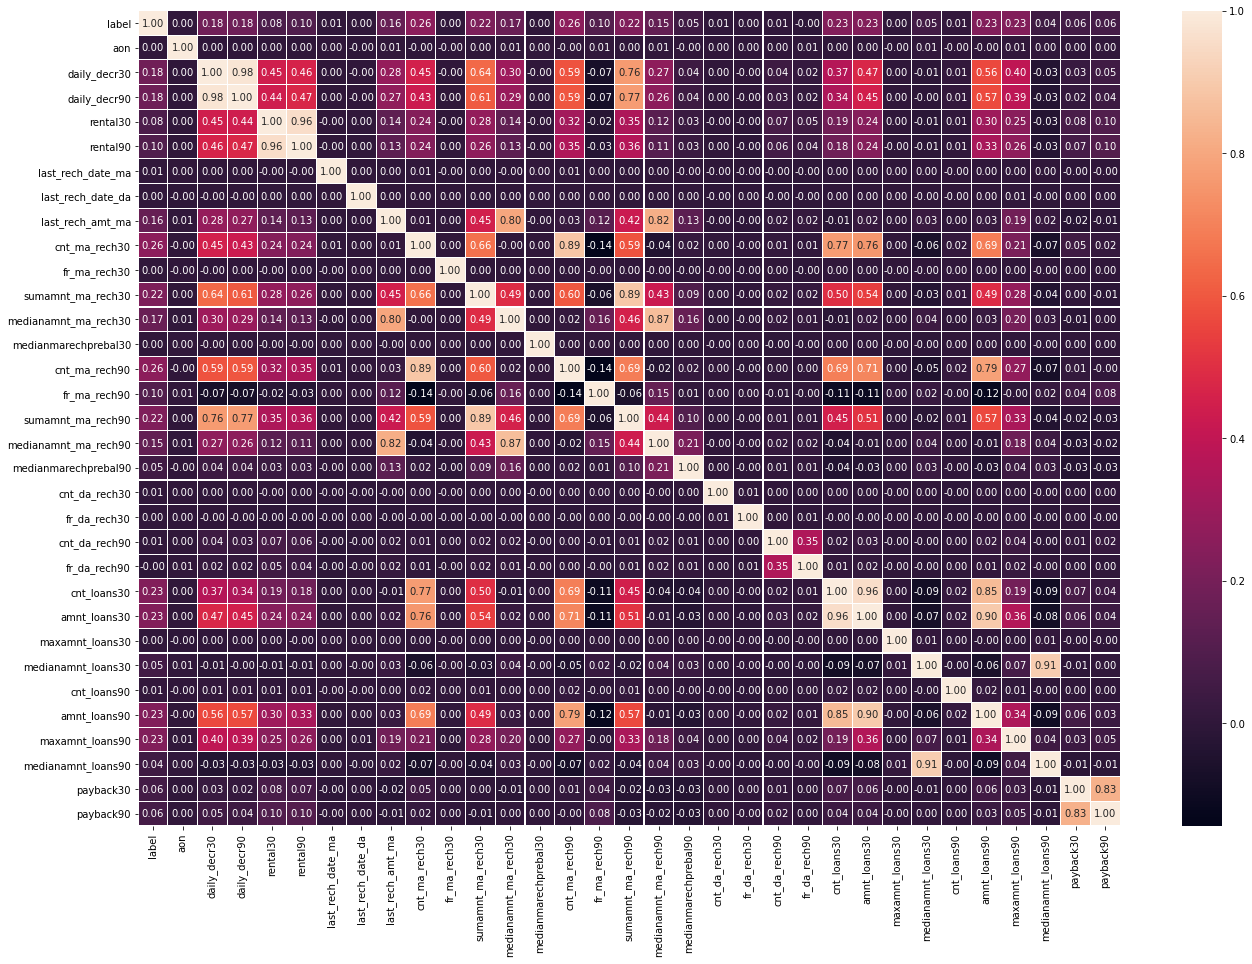

In [14]:
plt.figure(figsize=(22,15))
sns.heatmap(corr,annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')

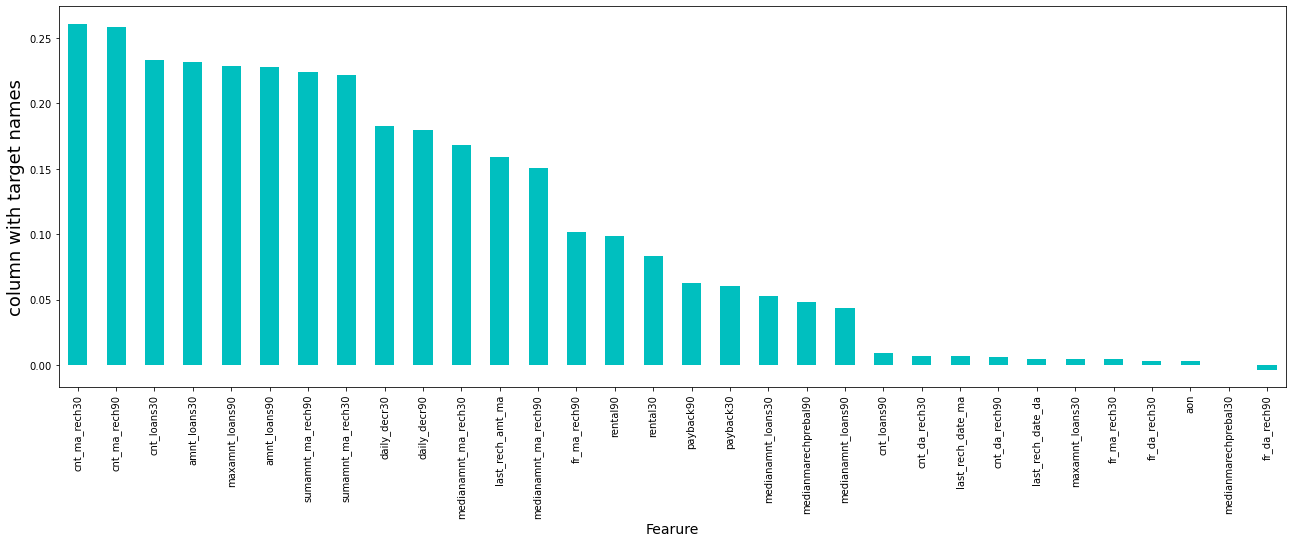

In [15]:
plt.figure(figsize=(22,7))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='c')
plt.xlabel('Fearure',fontsize=14)
plt.ylabel('column with target names',fontsize=18)
plt.show()

In [16]:
corr = df.corr()
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.260956
cnt_ma_rech90           0.258319
cnt_loans30             0.233310
amnt_loans30            0.231937
maxamnt_loans90         0.228723
amnt_loans90            0.227674
sumamnt_ma_rech90       0.223826
sumamnt_ma_rech30       0.221578
daily_decr30            0.182986
daily_decr90            0.179934
medianamnt_ma_rech30    0.168150
last_rech_amt_ma        0.159413
medianamnt_ma_rech90    0.150334
fr_ma_rech90            0.102014
rental90                0.098514
rental30                0.083734
payback90               0.062574
payback30               0.060596
medianamnt_loans30      0.052738
medianmarechprebal90    0.048502
medianamnt_loans90      0.043616
cnt_loans90             0.009195
cnt_da_rech30           0.007337
last_rech_date_ma       0.006634
cnt_da_rech90           0.006571
last_rech_date_da       0.004671
maxamnt_loans30         0.004447
fr_ma_rech30            0.004393
fr_da_rech30            0.003269
aon       

Correlation scores as per decending order which is easy to analyse

In [17]:
df.skew().sort_values(ascending=True)

label                   -2.107271
maxamnt_loans90          0.883434
fr_ma_rech90             2.311280
cnt_loans30              2.657143
amnt_loans30             2.922707
amnt_loans90             3.117881
cnt_ma_rech30            3.258259
cnt_ma_rech90            3.404250
medianamnt_ma_rech30     3.425817
medianamnt_ma_rech90     3.675696
last_rech_amt_ma         3.724061
daily_decr30             3.945468
daily_decr90             4.251862
rental90                 4.432706
rental30                 4.510429
medianamnt_loans30       4.619297
sumamnt_ma_rech90        4.884108
medianamnt_loans90       4.979114
sumamnt_ma_rech30        6.367302
payback90                6.913516
payback30                8.335430
aon                     10.488726
last_rech_date_ma       14.875527
fr_ma_rech30            14.876838
last_rech_date_da       14.934844
fr_da_rech30            14.948126
medianmarechprebal30    14.970822
cnt_loans90             16.773879
maxamnt_loans30         17.896553
cnt_da_rech30 

This time we will treat the skewness wit square root transformation method.

In [18]:
df = np.sqrt(df)
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,204075.000000,203774.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.862662,31.509211,51.781008,54.304026,41.269881,46.474372,6.230702,4.362272,38.918813,1.692382,...,1.504019,3.819040,3.551407,0.058070,1.953422,4.290300,2.499729,0.049600,1.127526,1.328115
std,0.344204,83.525171,51.941129,55.958371,32.438877,37.600601,60.621681,60.277041,22.878141,1.044827,...,0.687113,1.793941,15.958146,0.222549,3.788654,2.256092,0.566169,0.206129,1.453230,1.594353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,15.394804,6.434283,6.450840,17.311557,18.228549,1.000000,0.000000,27.748874,1.000000,...,1.000000,2.449490,2.449490,0.000000,1.000000,2.449490,2.449490,0.000000,0.000000,0.000000
50%,1.000000,22.715633,38.209946,38.729833,33.470285,37.355388,1.732051,0.000000,39.230090,1.732051,...,1.414214,3.464102,2.449490,0.000000,1.414214,3.464102,2.449490,0.000000,0.000000,1.290994
75%,1.000000,31.176915,85.105816,88.327232,58.605418,65.617128,2.645751,0.000000,48.052055,2.236068,...,2.000000,4.898979,2.449490,0.000000,2.236068,5.477226,2.449490,0.000000,1.936492,2.121320
max,1.000000,999.930375,515.680133,566.241998,446.011334,447.379157,999.324961,999.585819,234.520788,14.247807,...,7.071068,17.492856,316.013545,1.732051,70.693125,20.928450,3.464102,1.732051,13.095801,13.095801


In [19]:
df.isnull().sum()

label                      0
aon                        0
daily_decr30               0
daily_decr90               0
rental30                5518
rental90                5819
last_rech_date_ma          0
last_rech_date_da          0
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1614
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1694
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
dtype: int64

In [20]:
df['rental30']=np.where(df['rental30'].isnull(),1,0)
df['rental90']=np.where(df['rental90'].isnull(),1,0)
df['medianmarechprebal30']=np.where(df['medianmarechprebal30'].isnull(),1,0)
df['medianmarechprebal90']=np.where(df['medianmarechprebal90'].isnull(),1,0)

In [16]:
df.skew().sort_values(ascending=True)

maxamnt_loans90         -2.133257
label                   -2.107271
cnt_ma_rech30            0.338108
cnt_ma_rech90            0.577611
medianamnt_ma_rech30     0.592271
medianamnt_ma_rech90     0.703762
last_rech_amt_ma         0.745209
cnt_loans30              0.789575
sumamnt_ma_rech30        0.790235
amnt_loans30             0.879546
sumamnt_ma_rech90        0.948811
fr_ma_rech90             1.048988
daily_decr30             1.126297
amnt_loans90             1.141347
daily_decr90             1.230625
payback90                1.784195
payback30                1.921682
medianamnt_loans30       3.746458
medianamnt_loans90       4.093812
rental90                 5.748718
rental30                 5.917013
cnt_da_rech90            8.232148
aon                      9.881774
medianmarechprebal90    10.988019
medianmarechprebal30    11.263611
cnt_loans90             13.897120
last_rech_date_ma       14.314038
fr_ma_rech30            14.330299
last_rech_date_da       14.359661
fr_da_rech30  

In [17]:
corr = df.corr()
corr['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.379483
cnt_ma_rech30           0.374509
sumamnt_ma_rech90       0.357033
sumamnt_ma_rech30       0.354055
amnt_loans90            0.317059
amnt_loans30            0.311731
cnt_loans30             0.307707
medianamnt_ma_rech30    0.294255
maxamnt_loans90         0.290766
last_rech_amt_ma        0.280816
medianamnt_ma_rech90    0.276900
daily_decr30            0.247680
daily_decr90            0.247393
fr_ma_rech90            0.193659
payback90               0.192335
payback30               0.186727
cnt_loans90             0.078029
medianamnt_loans30      0.054937
medianamnt_loans90      0.044939
rental90                0.033087
rental30                0.031759
aon                     0.027034
cnt_da_rech90           0.017172
maxamnt_loans30         0.014615
fr_ma_rech30            0.009695
last_rech_date_ma       0.007828
cnt_da_rech30           0.007531
last_rech_date_da       0.005232
fr_da_rech30            0.003498
fr_da_rech

In [27]:
last_rech_date_ma       14.314038
cnt_da_rech30           15.707789
fr_da_rech90            19.698987
fr_da_rech30            14.402631
fr_ma_rech30            14.330299
last_rech_date_da       14.359661

SyntaxError: invalid syntax (<ipython-input-27-67a2d7571fb2>, line 1)

These features have the least correlation and highest skewness with the target variable.Hence, removing these features from the dataset.

In [21]:
df.drop(['last_rech_date_ma','cnt_da_rech30','fr_da_rech90','fr_da_rech30','fr_ma_rech30','last_rech_date_da'],axis=1,inplace=True)

# Making dataframe of the ordinal data

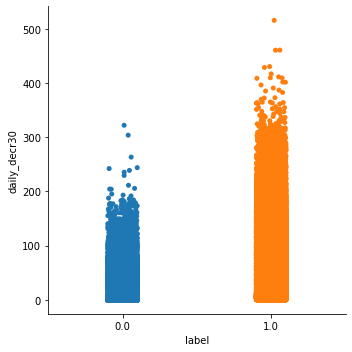

In [22]:
sns.catplot(x='label',y='daily_decr30',data=df)

Comparison for 30 days averaged daily amount spent from main account.

Comparison for average main account balance over last 30 days

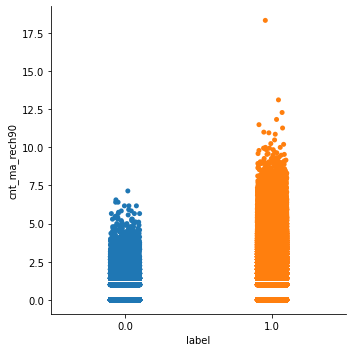

In [24]:
sns.catplot(x='label',y='cnt_ma_rech90',data=df)

Comparison for Number of times main account got recharged in last 90 days

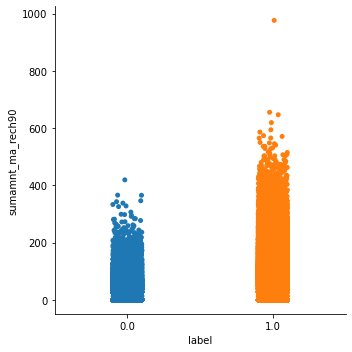

In [25]:
sns.catplot(x='label',y='sumamnt_ma_rech90',data=df)

Total amount of recharge in main account over last 90 days.

Number of days till last recharge of data account

<Figure size 1152x576 with 0 Axes>

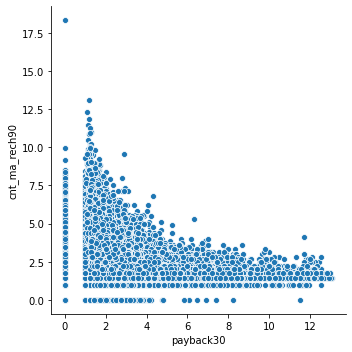

In [26]:
plt.figure(figsize=(16,8))
sns.relplot(y='cnt_ma_rech90',x='payback30',data=df)

Comparison between 30 days average daily amount spent from main account and Average payback time in days over last 30 days

<Figure size 1152x576 with 0 Axes>

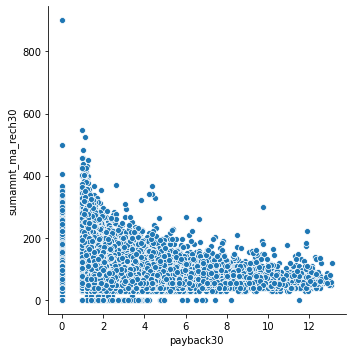

In [27]:
plt.figure(figsize=(16,8))
sns.relplot(y='sumamnt_ma_rech30',x='payback30',data=df)

<Figure size 1152x576 with 0 Axes>

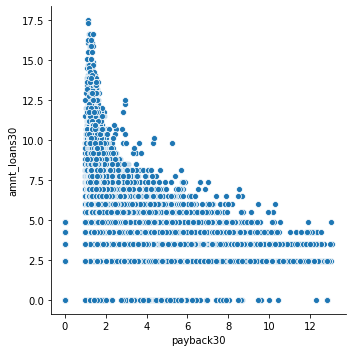

In [28]:
plt.figure(figsize=(16,8))
sns.relplot(y='amnt_loans30',x='payback30',data=df)

Total amount of loans taken by user in last 30 days vs Average payback time in days over last 30 days. 

Here, we can understand customers who taking loan more than 10rs are delaying in paying back or failing to payback.

<Figure size 1152x576 with 0 Axes>

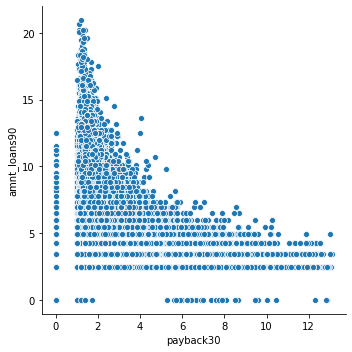

In [29]:
plt.figure(figsize=(16,8))
sns.relplot(y='amnt_loans90', x='payback30',data=df)

<Figure size 1152x576 with 0 Axes>

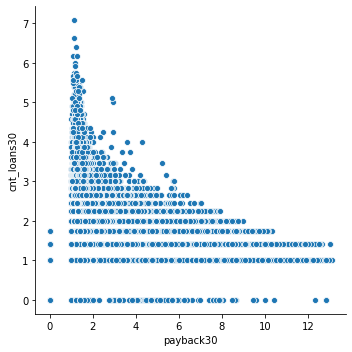

In [30]:
plt.figure(figsize=(16,8))
sns.relplot(y='cnt_loans30', x='payback30',data=df)

# Finally we are done with Datacleaning and visualizing. Now, we need to look forward to handle the data imbalance and train the data and prepare the model

In [31]:
Data_loss=((33-27)/37)*100
Data_loss

16.216216216216218

We have removed columns base on certain consideration which leads to 16% data loss.

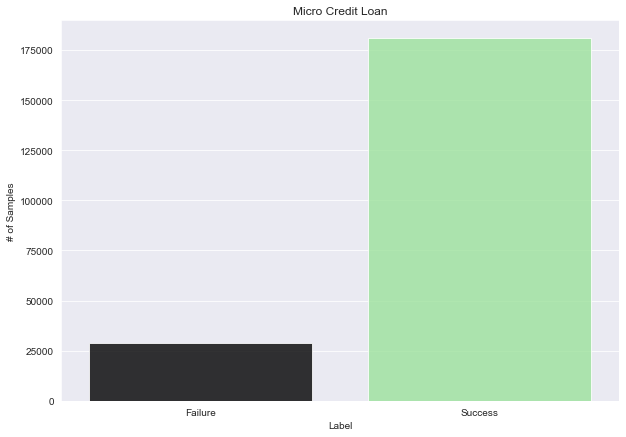

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
fig1=sns.countplot(df['label'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Micro Credit Loan')
plt.ylabel('# of Samples')
plt.xlabel('Label')
fig1.set(xticklabels=['Failure','Success'])
plt.show()

As we can observe that the data is hugely imbalanced. This could be handled with Under or Over sampling.

In [33]:
x=df.drop('label',axis=1)
y=df['label']

# Finding the Best Random State

In [34]:
maxAccu=0
maxRS=0
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test,predLR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy score is ',maxAccu,'on Random State',maxRS)

Best accuracy score is  0.8865421928178377 on Random State 51


# Oversampling to handle the imbalance problem

In [35]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler(0.7)
x_train_os,y_train_os=os.fit_resample(x_train,y_train)
print('The number of classes before the fit {}'.format(Counter(y_train)))
print('The number of classes after the fit {}'.format(Counter(y_train_os)))

The number of classes before the fit Counter({1.0: 126554, 0.0: 20161})
The number of classes after the fit Counter({1.0: 126554, 0.0: 88587})


With the upper sampling we go 126554 rows as 1 and 88587 as 0.

In [36]:
LR = LogisticRegression()
LR.fit(x_train_os,y_train_os)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8004707528865422
[[ 6130  2494]
 [10052 44202]]
              precision    recall  f1-score   support

         0.0       0.38      0.71      0.49      8624
         1.0       0.95      0.81      0.88     54254

    accuracy                           0.80     62878
   macro avg       0.66      0.76      0.68     62878
weighted avg       0.87      0.80      0.82     62878



In [37]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train_os,y_train_os)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.8982633035401889
[[ 4508  4116]
 [ 2281 51973]]
              precision    recall  f1-score   support

         0.0       0.66      0.52      0.58      8624
         1.0       0.93      0.96      0.94     54254

    accuracy                           0.90     62878
   macro avg       0.80      0.74      0.76     62878
weighted avg       0.89      0.90      0.89     62878



In [38]:
from sklearn.tree import DecisionTreeClassifier
DT = RandomForestClassifier()
DT.fit(x_train_os,y_train_os)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8989948789719775
[[ 4532  4092]
 [ 2259 51995]]
              precision    recall  f1-score   support

         0.0       0.67      0.53      0.59      8624
         1.0       0.93      0.96      0.94     54254

    accuracy                           0.90     62878
   macro avg       0.80      0.74      0.77     62878
weighted avg       0.89      0.90      0.89     62878



# Cross-Validation of the Model:

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
SCR=cross_val_score(LR,x,y,cv=5)
print('Cross Validation score of LogisticRegression Model is :',SCR.mean())

Cross Validation score of LogisticRegression Model is : 0.8842900324875362


In [49]:
SCR=cross_val_score(RF,x,y,cv=5)
print('Cross Validation score of RanfomForestClassifier Model is :',SCR.mean())

Cross Validation score of RanfomForestClassifier Model is : 0.9057983820923756


In [50]:
SCR=cross_val_score(DT,x,y,cv=5)
print('Cross Validation score of DecisionTreeClassifier Model is :',SCR.mean())

Cross Validation score of DecisionTreeClassifier Model is : 0.9054262322818405


As per the cross validation we chose RandomForestClassifier as a best model with the accuracy score of 0.90

# Hyper Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter = {'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [58]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [59]:
GCV.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [60]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [61]:
mod=RandomForestClassifier(criterion='gini',max_depth=14,random_state=51)
mod.fit(x_train_os,y_train_os)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.4805178281752


When we do hyper parameter tuning the accuracy is reduced to 87.4

# Save the model

In [62]:
import pickle
filename='microcredit.pkl'
pickle.dump(RF, open(filename, 'wb'))

# Conclusion:

In [65]:
loaded_model = pickle.load(open('microcredit.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8982633035401889


We are getting 90% accuracy when we are doing a testing the accuracy.

In [68]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],predRF[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,62868,62869,62870,62871,62872,62873,62874,62875,62876,62877
Predicted,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
Original,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
